# Linear classifier + RBF kernel
## 신경망을 쓰지 않고 선형 분류기에 커널 트릭을 적용하여 비선형 문제를 해결

In [0]:
# Reference: https://gist.github.com/naturale0/fed8fb2486111b442224446762438720

In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

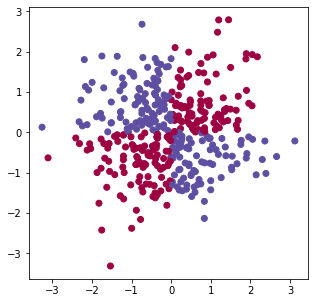

In [17]:
# XOR toy data
N = 200  # approximate number of samples per class
D = 2    # data dimension
K = 2    # number of classes

x = np.random.randn(N*K, D)
y = np.logical_xor(x[:, 0] > 0, x[:, 1] > 0)
y = np.where(y, 1, 0)

plt.figure(figsize=(5,5))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=mpl.cm.Spectral)

In [0]:
polyfy = PolynomialFeatures(2)
x_poly = polyfy.fit_transform(x)
D = x_poly.shape[1]

In [19]:
# initialize weights (and bias)
W = np.random.randn(D, K) * 0.01
b = np.zeros(K)
losses = []

# training process
for epoch in range(5000):
    # construct linear score function
    f = x_poly.dot(W) + b
    
    # backprop to compute gradients
    p = np.exp(f) / np.sum(np.exp(f), axis=1, keepdims=True)
    I = np.zeros(p.shape)
    I[range(x_poly.shape[0]), y] = 1
    df = (p - I) / x_poly.shape[0]
    reg = 0.001
    
    dW = (x_poly.T).dot(df)
    dW += reg * W
    db = np.sum(df, axis=0)
    
    # update weights
    eta = 0.05  # learning rate
    W -= eta * dW
    b -= eta * db
    
    # print loss
    data_loss = -np.sum(np.log(p[range(x_poly.shape[0]), y])) / x_poly.shape[0]
    reg_loss = np.sum(0.5 * reg * (W**2))
    loss = data_loss + reg_loss
    losses.append(loss)
    if epoch % 1000 == 0:
        print("{}: loss={}".format(epoch, loss))

0: loss=0.6942121131645101
1000: loss=0.2336064920002606
2000: loss=0.2024392783680294
3000: loss=0.18946102858455977
4000: loss=0.18251403153735551


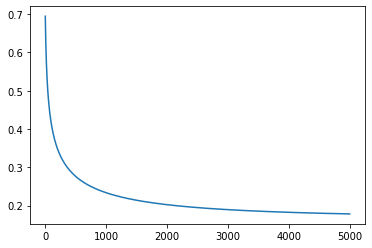

In [20]:
plt.plot(losses)

In [21]:
# prediction
pred = np.argmax(x_poly.dot(W) + b, axis=1)
# accuracy
acc = (pred==y) / float(y.shape[0])
print(sum(acc))

0.9774999999999902


In [0]:
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200), np.linspace(-1.5, 1.5, 200))

In [0]:
x_test = polyfy.fit_transform(np.c_[xx.flatten(), yy.flatten()])
y_test = x_test.dot(W) + b
y_test = np.argmax(y_test, axis=1).reshape(200, 200)

(-1.5, 1.5)

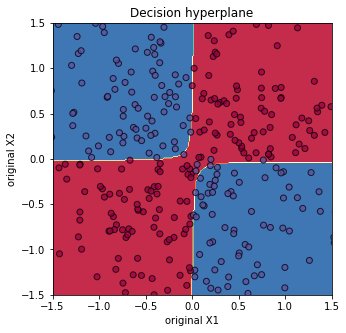

In [24]:
plt.figure(figsize=(5,5))
plt.contourf(xx, yy, y_test, cmap=mpl.cm.Spectral)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=mpl.cm.Spectral, edgecolor="k", alpha=.75)
plt.title("Decision hyperplane")
plt.xlabel("original X1")
plt.ylabel("original X2")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# 2-layer Neural Net
## Hidden Layer 1개가 존재 (Input Layer - Hidden Layer - Output Layer)

## Fisher's iris data
### 전문 식물학자가 setosa, versicolor, virginica 종으로 분류한 붓꽃의 측정 데이터

In [0]:
iris = load_iris()
x = iris.data[:, [0, 2]]
y = iris.target

In [26]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [27]:
x

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [28]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
N = 50  # number of samples per class
D = 2    # data dimension
K = 3    # number of classes

In [0]:
# eta : learning rate (오차의 수정을 반영하기 위한 학습률) / reg : 정규화 강도 (오버피팅(Overfitting 방지))
def train_nn(x, y, D, K, reg=.001, eta=.05, epochs=5000):
    # initialize weights & biases (가중치와 편향치 초기값 세팅)
    W1 = np.random.randn(D, 100) * 0.01
    b1 = np.zeros((1, 100))
    W2 = np.random.randn(100, K) * 0.01
    b2 = np.zeros((1, K))

    # training process
    losses = []

    # training a model 
    for epoch in range(epochs):
        h  = np.maximum(0, x.dot(W1) + b1)  # hidden layer
        f = h.dot(W2) + b2  # final layer

        # backprop to hidden layer
        p = np.exp(f) / np.sum(np.exp(f), axis=1, keepdims=True)
        dhidden = p.copy()
        dhidden[range(x.shape[0]), y] -= 1
        dhidden /= x.shape[0]
        dW2 = (h.T).dot(dhidden) + reg * W2
        db2 = np.sum(dhidden, axis=0, keepdims=True)

        # backprop the activation (relu)
        drelu = (dhidden).dot(W2.T)
        drelu[h <= 0] = 0

        # backprop to input layer
        dW1 = (x.T).dot(drelu) + reg * W1
        db1 = np.sum(drelu, axis=0, keepdims=True)

        # update weights
        W1 -= eta * dW1; b1 -= eta * db1
        W2 -= eta * dW2; b2 -= eta * db2

        # compute loss
        data_loss = -np.sum(np.log(p[range(x.shape[0]), y])) / x.shape[0]
        reg_loss = 0.5 * reg * (np.sum(W2**2) + np.sum(W1**2))
        loss = data_loss + reg_loss
        losses.append(loss)
        if epoch % 1000 == 0:
            #print data_loss, reg_loss
            print("{}: loss={}".format(epoch, loss))
    
    return W1, b1, W2, b2, losses

In [31]:
W1, b1, W2, b2, losses = train_nn(x, y, D, K)

0: loss=1.0978292473798288
1000: loss=0.15402160659566935
2000: loss=0.13898974559967275
3000: loss=0.12927859310306317
4000: loss=0.12161517899512245


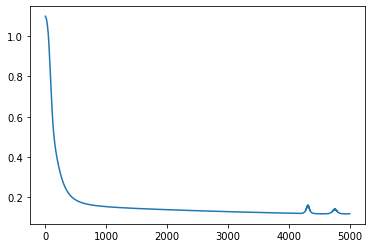

In [32]:
plt.plot(losses)

In [33]:
# prediction
hidd = np.maximum(0, x.dot(W1) + b1)
scores = hidd.dot(W2) + b2
pred = np.argmax(scores, axis=1)
# accuracy
acc = (pred==y) / float(y.shape[0])
print(sum(acc))

0.9600000000000023


In [0]:
xx, yy = np.meshgrid(np.linspace(4, 8, 200),
np.linspace(0, 7, 200))
hh = np.maximum(0, (np.c_[xx.flatten(), yy.flatten()]).dot(W1) + b1)
ff = hh.dot(W2) + b2
test = np.argmax(ff, axis=1)

Text(0, 0.5, 'X2')

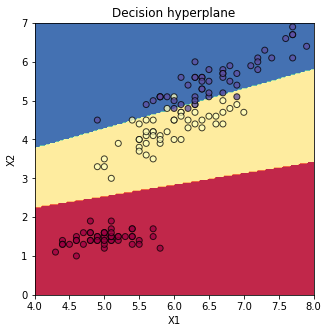

In [35]:
plt.figure(figsize=(5,5))
plt.contourf(xx, yy, test.reshape(200, 200),
cmap=mpl.cm.Spectral)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=mpl.cm.Spectral, edgecolor="k", alpha=.75)
#plt.xlim(-3.5, 3.5)
#plt.ylim(-3.5, 3.5)
plt.title("Decision hyperplane")
plt.xlabel("X1")
plt.ylabel("X2")

## XOR

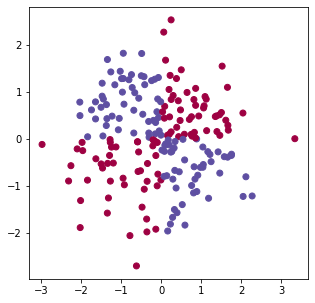

In [36]:
N = 100  # approximate number of samples per class
D = 2    # data dimension
K = 2    # number of classes

x = np.random.randn(N*K, D)
y = np.logical_xor(x[:, 0] > 0, x[:, 1] > 0)
y = np.where(y, 1, 0)

plt.figure(figsize=(5,5))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=mpl.cm.Spectral)

In [37]:
W1, b1, W2, b2, losses = train_nn(x, y, D, K)

0: loss=0.6931408904129913
1000: loss=0.2350723164395016
2000: loss=0.14316659722954572
3000: loss=0.12222289506895315
4000: loss=0.11345273916127899


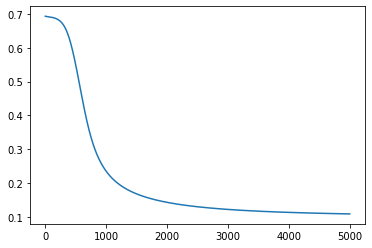

In [38]:
plt.plot(losses)

In [39]:
# prediction
hidd = np.maximum(0, x.dot(W1) + b1)
scores = hidd.dot(W2) + b2
pred = np.argmax(scores, axis=1)
# accuracy
acc = (pred==y) / float(y.shape[0])
print(sum(acc))

0.9950000000000008


In [0]:
xx, yy = np.meshgrid(np.linspace(-3.5, 3.5, 200),
np.linspace(-3.5, 3.5, 200))
hh = np.maximum(0, (np.c_[xx.flatten(), yy.flatten()]).dot(W1) + b1)
ff = hh.dot(W2) + b2
test = np.argmax(ff, axis=1)

Text(0, 0.5, 'X2')

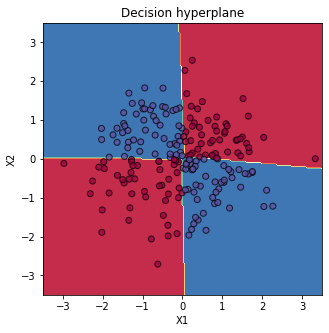

In [41]:
plt.figure(figsize=(5,5))
plt.contourf(xx, yy, test.reshape(200, 200),
cmap=mpl.cm.Spectral)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=mpl.cm.Spectral, edgecolor="k", alpha=.75)
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)
plt.title("Decision hyperplane")
plt.xlabel("X1")
plt.ylabel("X2")

## Spiral data

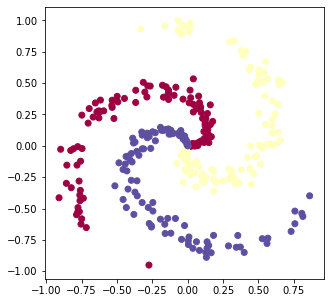

In [42]:
N = 100  # number of samples per class
D = 2    # data dimension
K = 3    # number of classes

x = np.zeros((N*K, D))
y = np.zeros(N*K, dtype=np.uint8)

for j in range(K):
    ix = range(j*N, (j+1)*N)
    
    # set radius and theta for polar coordinates
    r = np.linspace(0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + 0.2 * np.random.randn(N)
    
    # set coordinate of each data points
    x[ix] = np.c_[r*np.cos(t), r*np.sin(t)]
    for ixs in ix:
        y[ixs] = j

plt.figure(figsize=(5,5))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=mpl.cm.Spectral)

In [43]:
W1, b1, W2, b2, losses = train_nn(x, y, D, K, eta=.15, epochs=10000)

0: loss=1.0985435661253669
1000: loss=0.6572166110354805
2000: loss=0.4679910638534449
3000: loss=0.3742411139041528
4000: loss=0.35055377983274144
5000: loss=0.33247122436473947
6000: loss=0.3159158294342656
7000: loss=0.2979425104807829
8000: loss=0.2867798876727878
9000: loss=0.27998538806681994


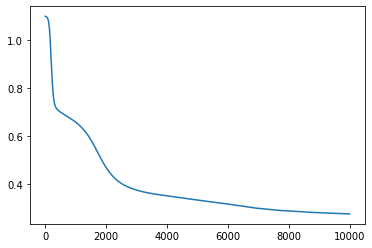

In [44]:
plt.plot(losses)

In [45]:
# prediction
hidd = np.maximum(0, x.dot(W1) + b1)
scores = hidd.dot(W2) + b2
pred = np.argmax(scores, axis=1)
# accuracy
acc = (pred==y) / float(y.shape[0])
print(sum(acc))

0.9633333333333298


Text(0, 0.5, 'X2')

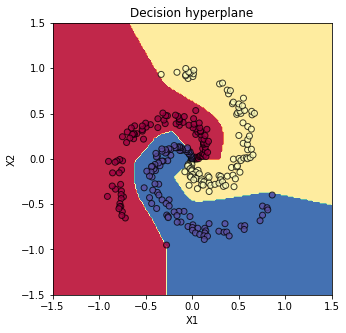

In [46]:
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200),
np.linspace(-1.5, 1.5, 200))
hh = np.maximum(0, (np.c_[xx.flatten(), yy.flatten()]).dot(W1) + b1)
ff = hh.dot(W2) + b2
test = np.argmax(ff, axis=1)

plt.figure(figsize=(5,5))
plt.contourf(xx, yy, test.reshape(200, 200),
cmap=mpl.cm.Spectral)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=mpl.cm.Spectral, edgecolor="k", alpha=.75)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.title("Decision hyperplane")
plt.xlabel("X1")
plt.ylabel("X2")

### animated

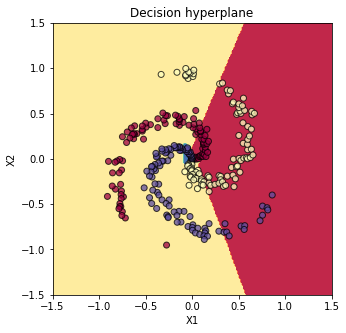

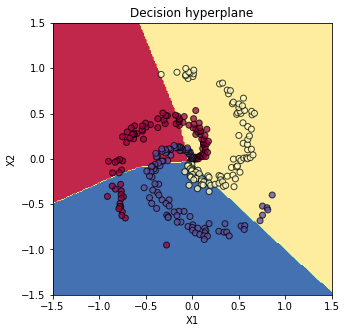

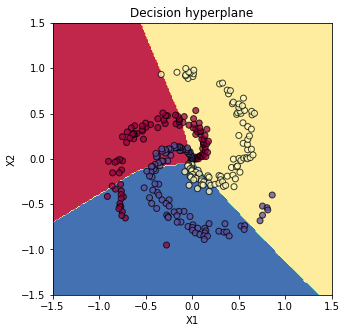

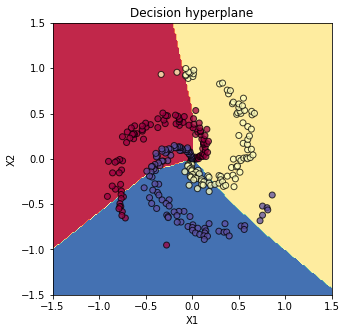

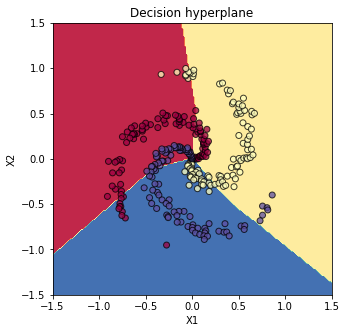

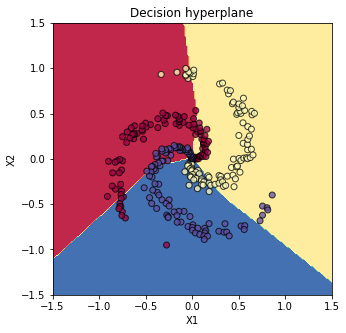

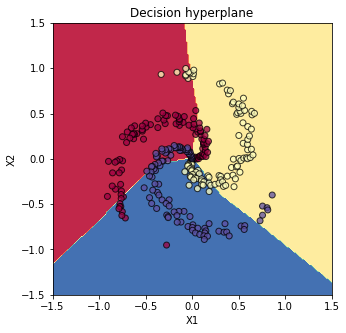

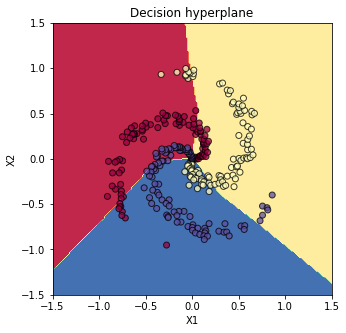

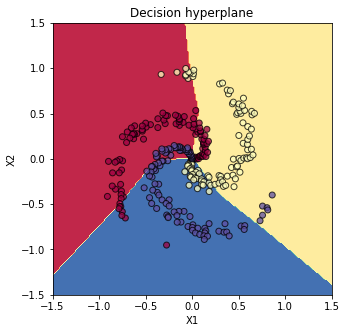

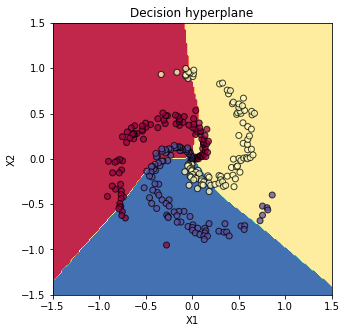

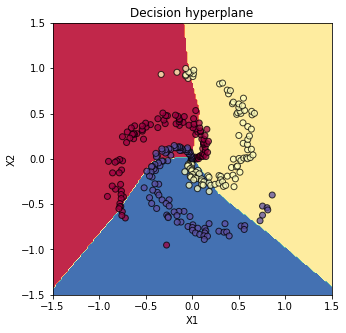

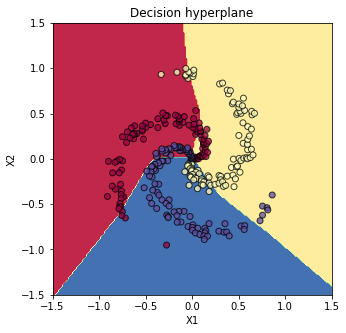

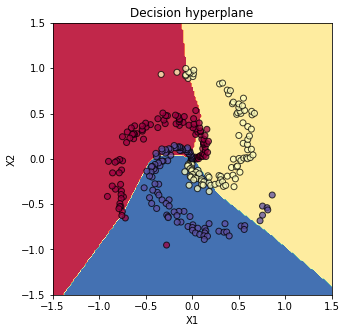

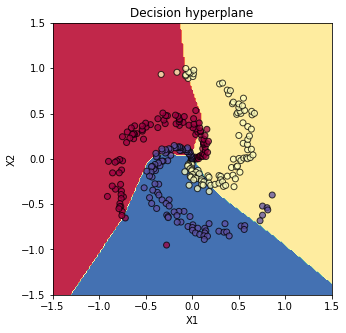

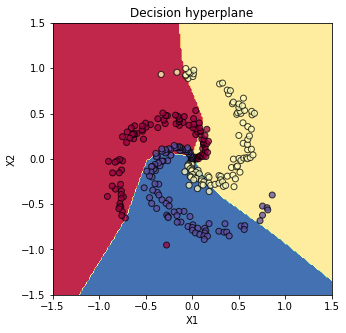

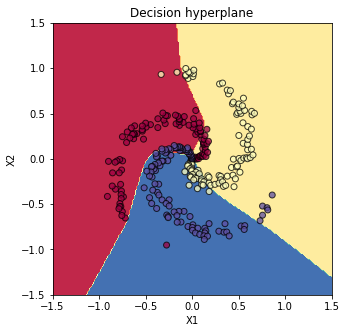

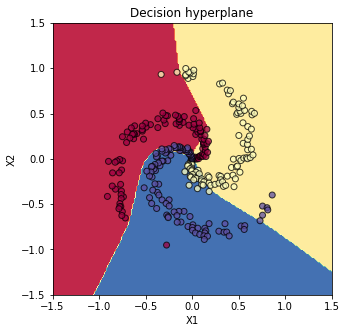

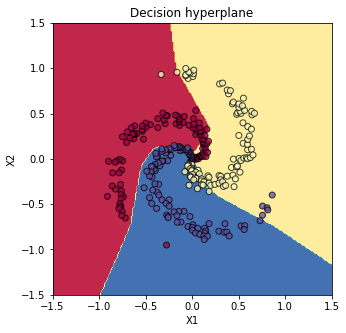

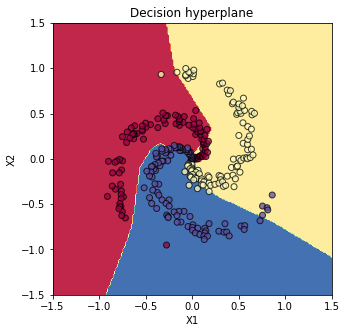

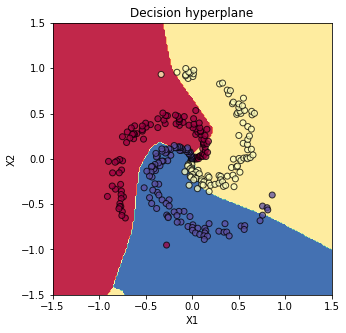

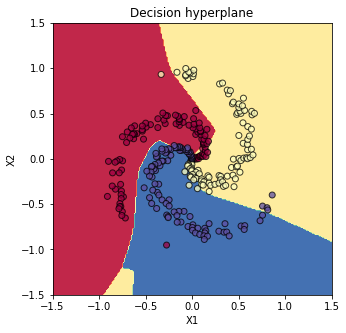

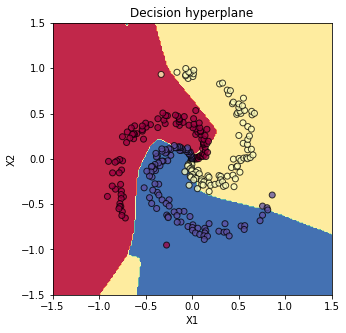

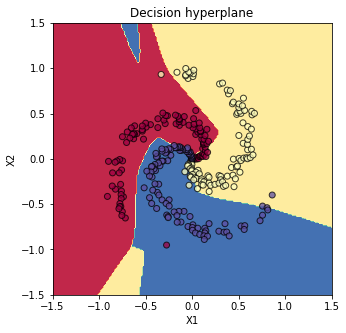

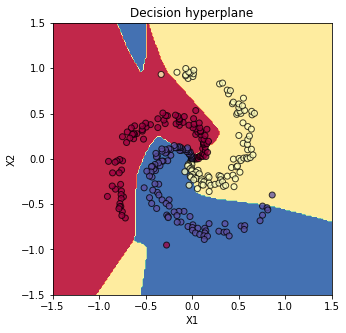

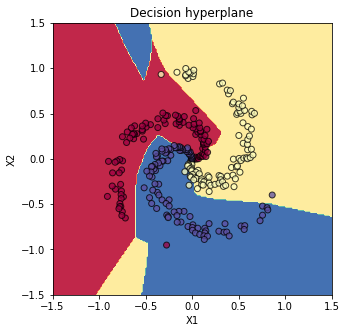

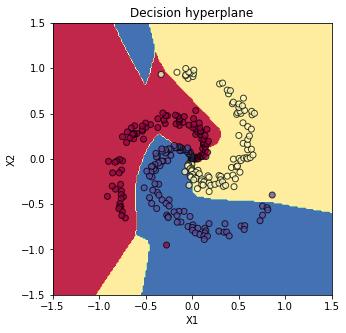

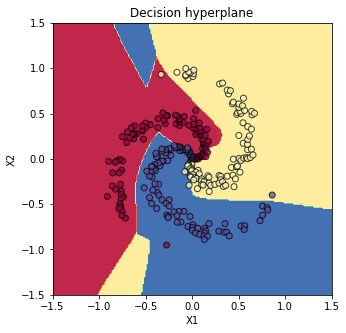

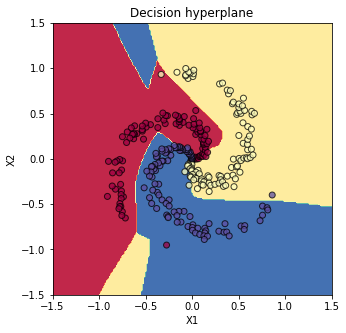

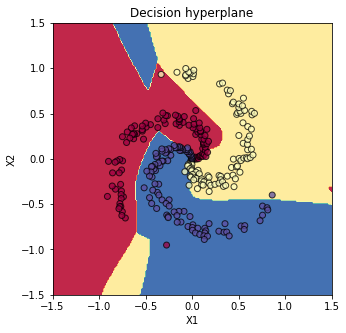

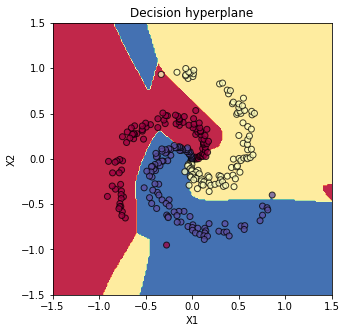

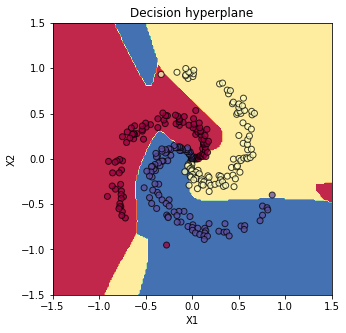

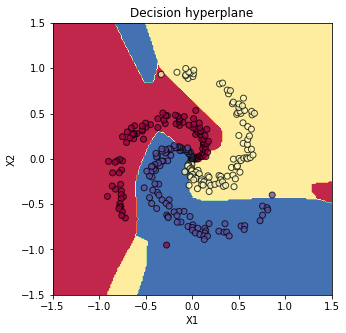

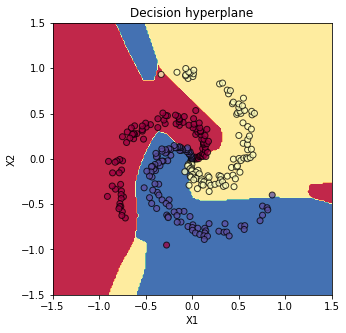

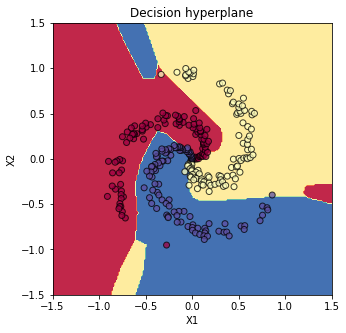

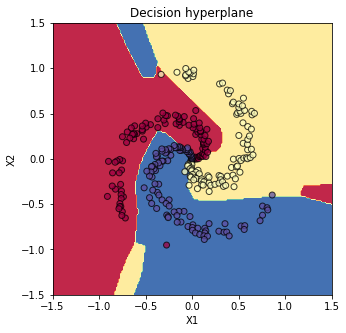

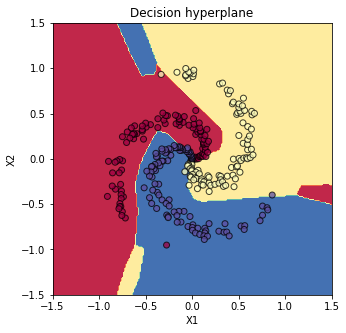

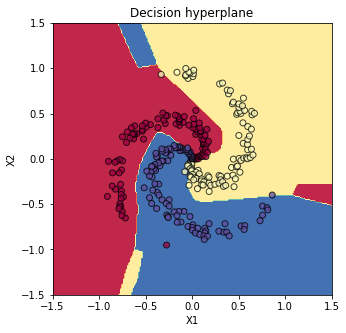

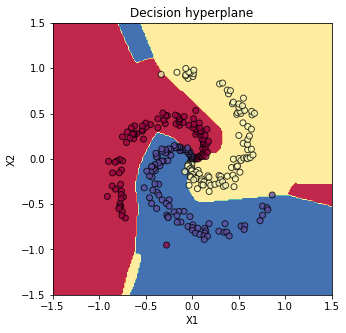

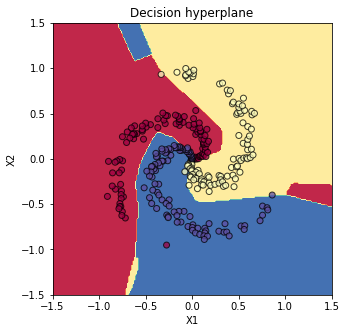

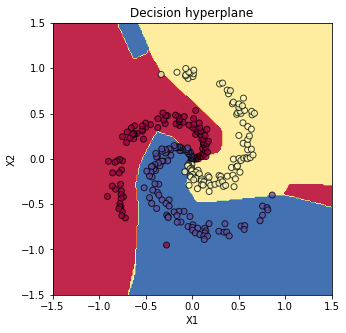

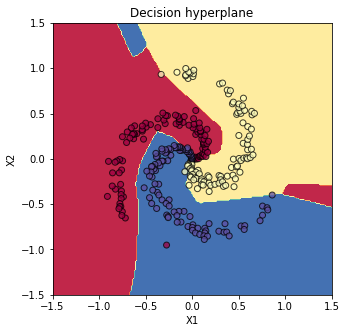

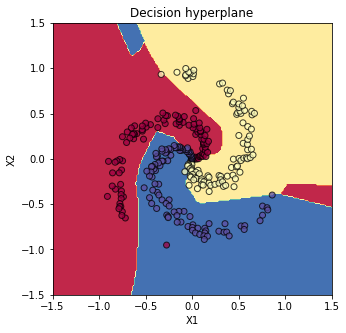

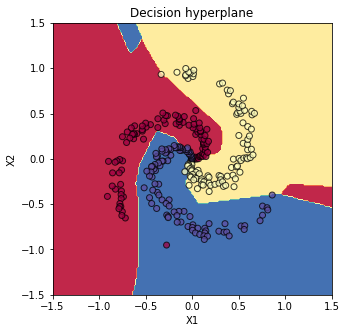

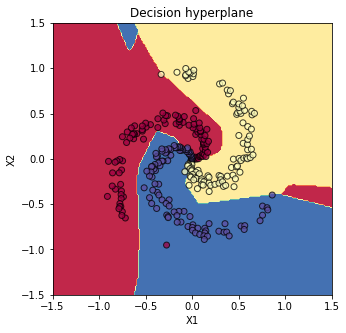

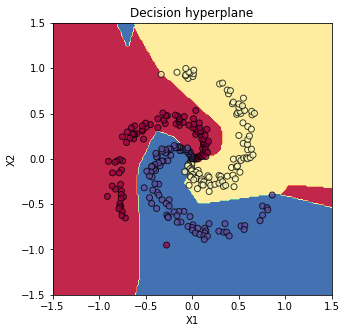

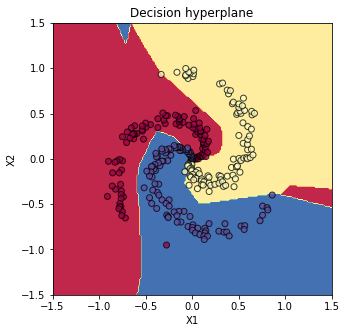

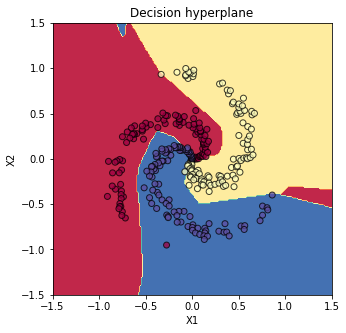

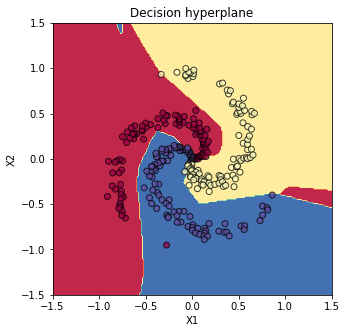

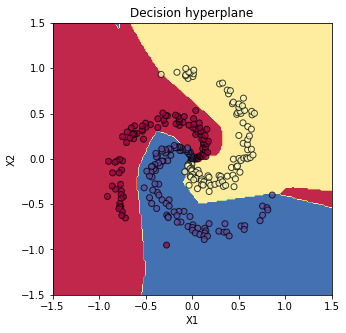

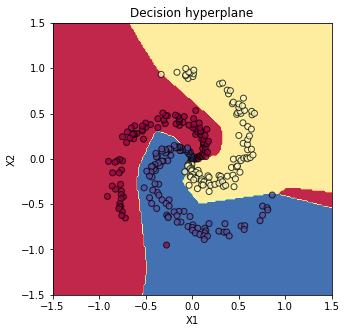

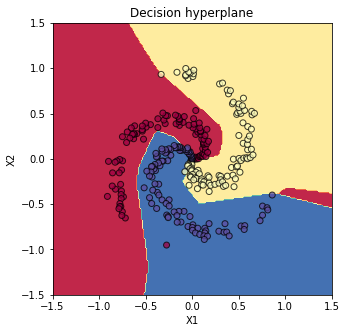

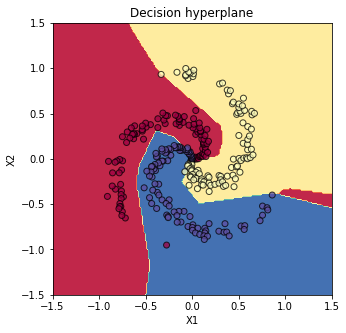

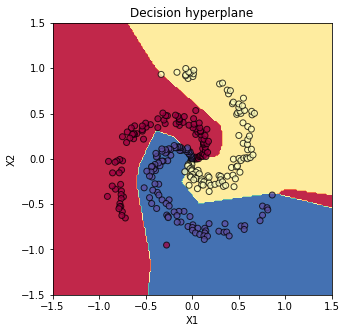

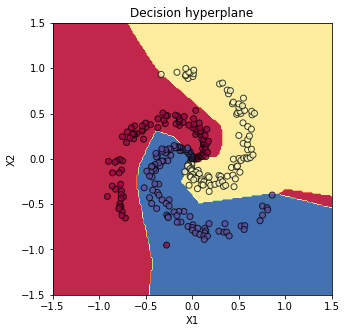

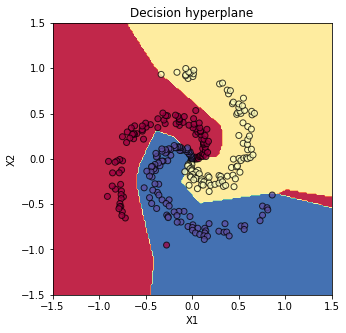

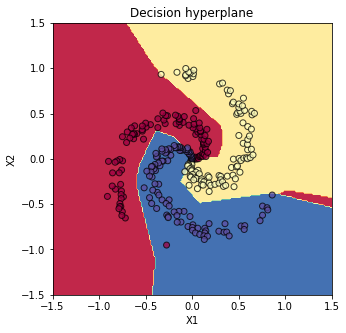

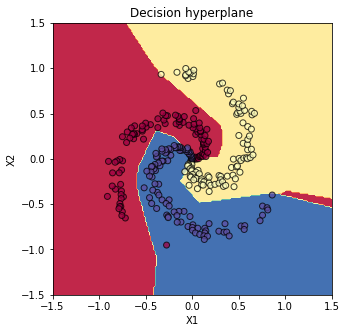

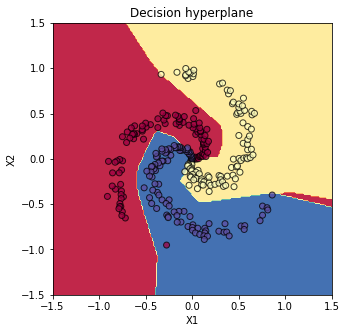

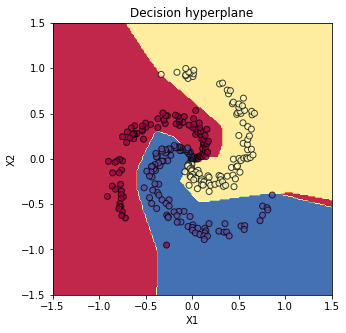

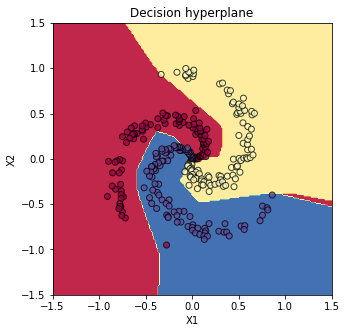

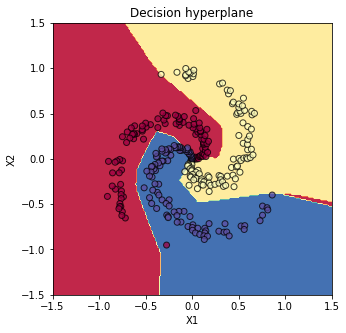

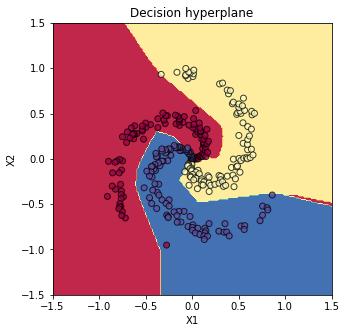

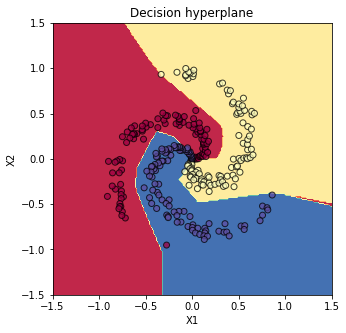

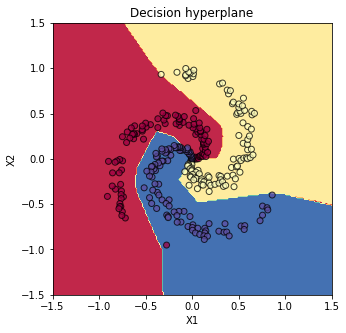

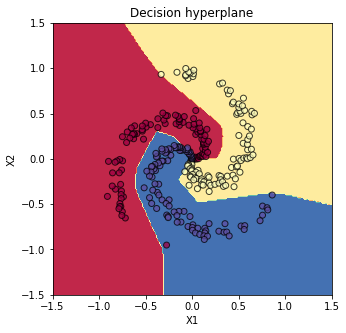

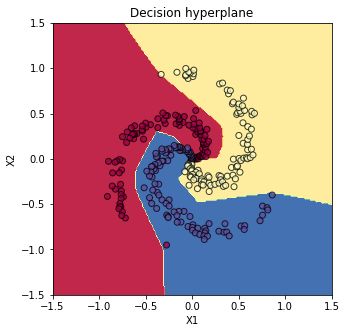

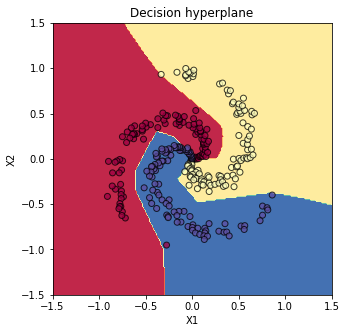

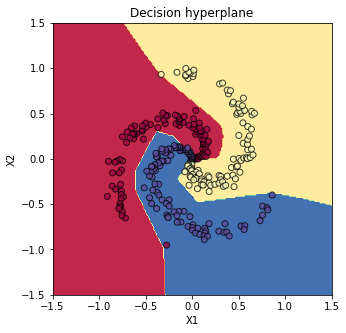

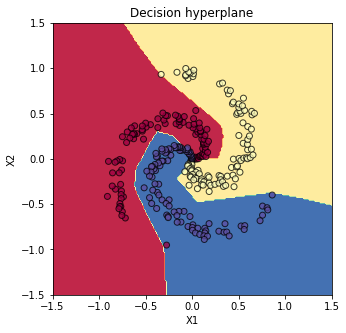

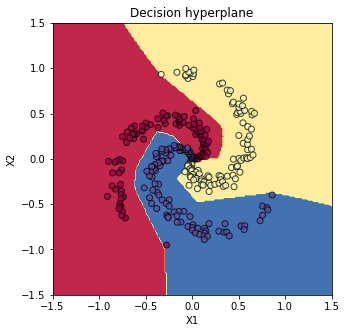

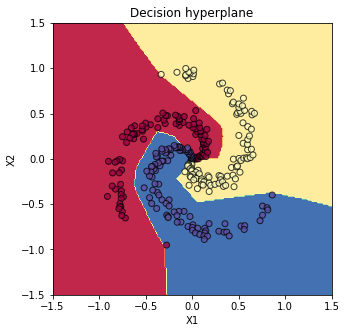

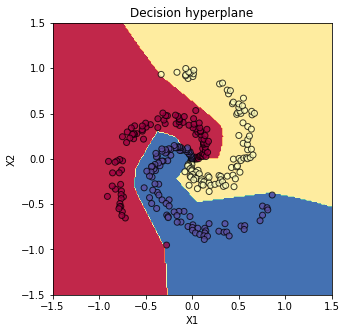

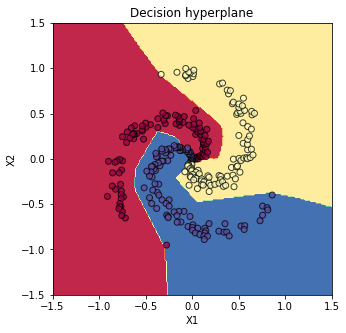

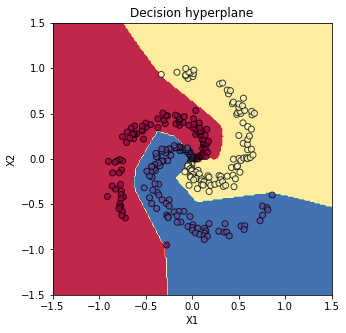

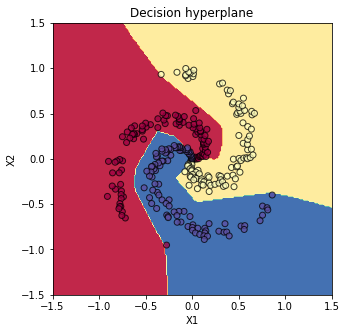

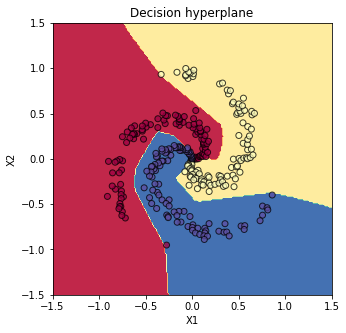

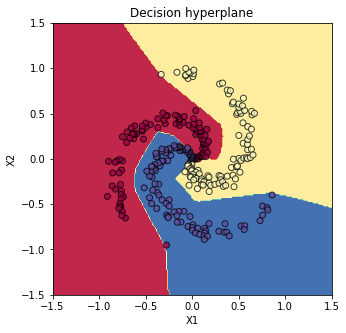

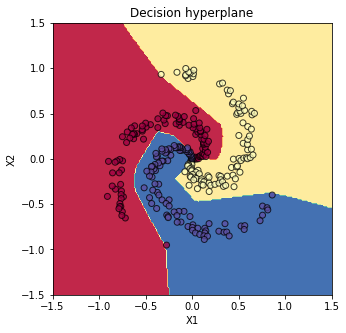

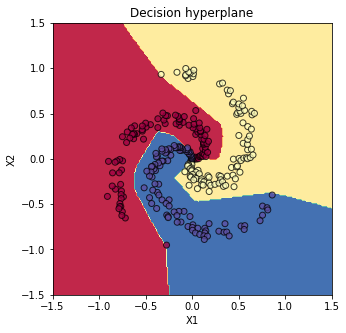

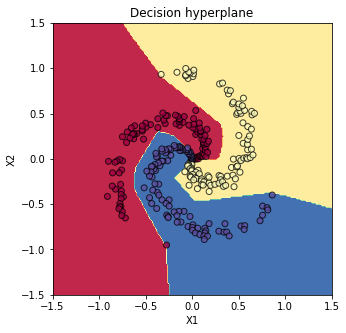

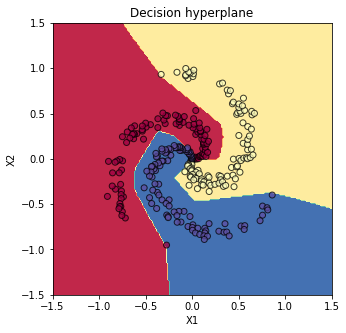

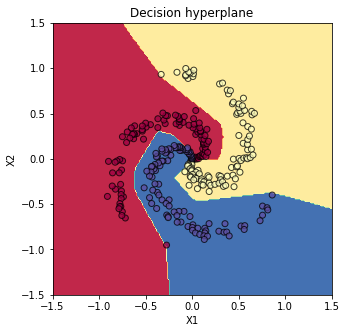

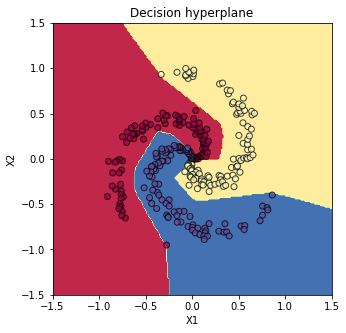

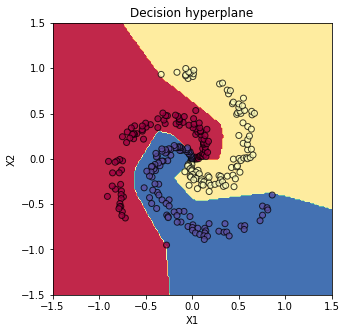

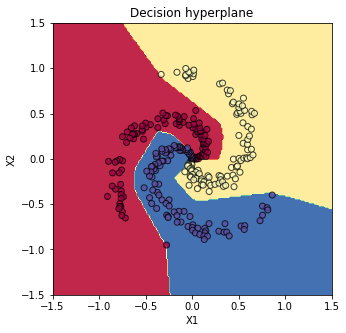

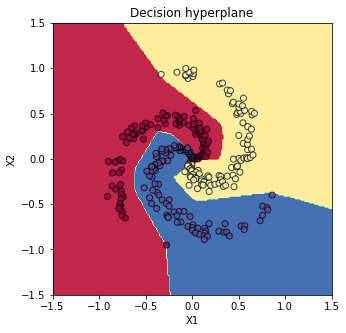

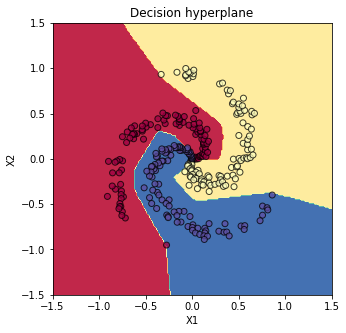

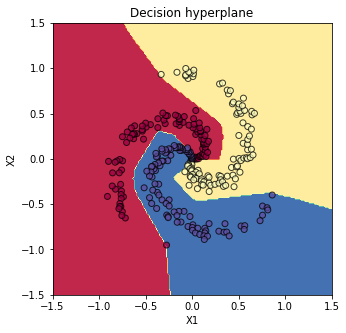

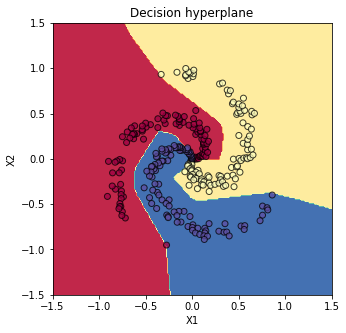

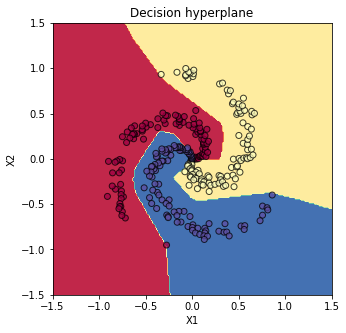

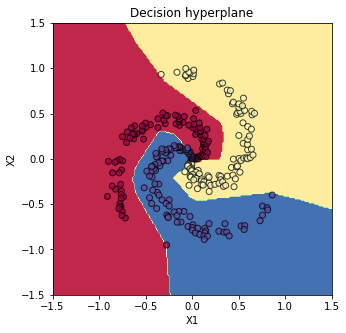

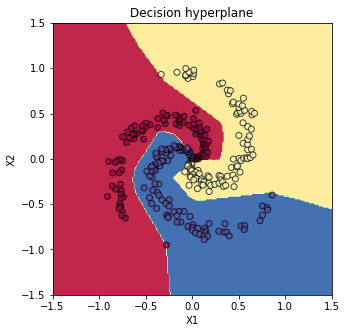

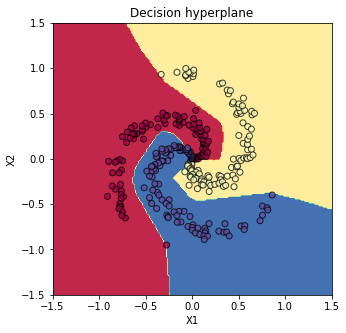

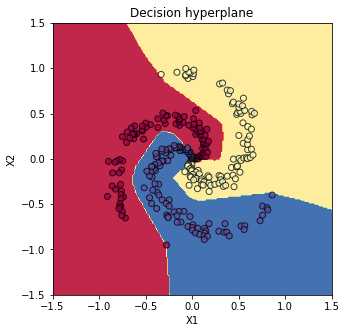

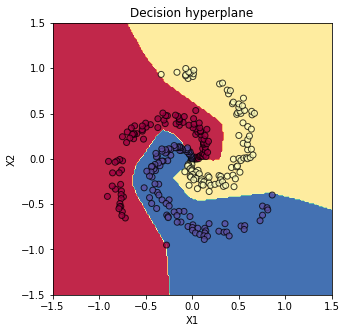

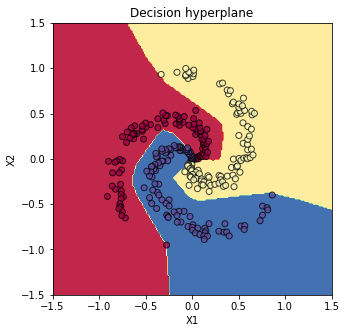

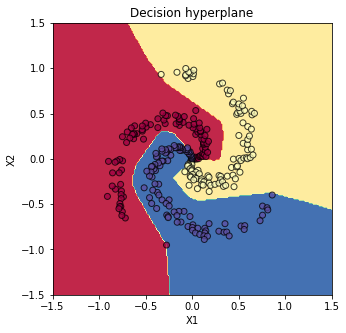

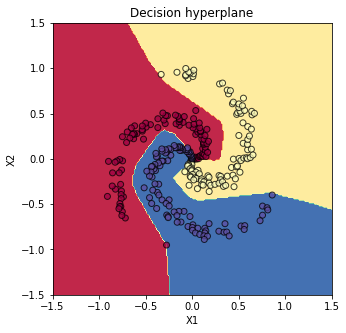

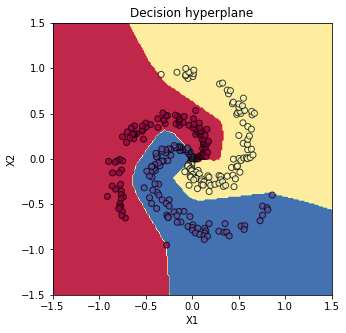

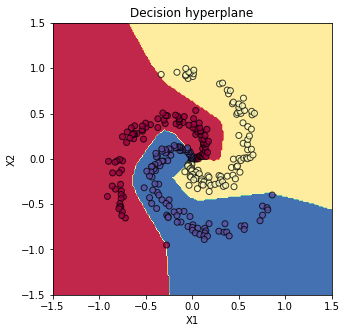

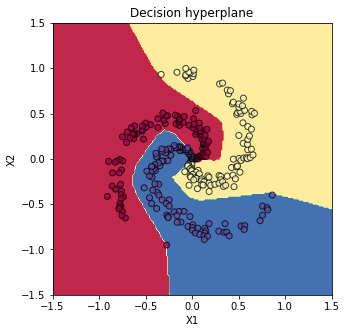

Done


In [47]:
W1 = np.random.randn(D, 100) * 0.01
b1 = np.zeros((1, 100))
W2 = np.random.randn(100, K) * 0.01
b2 = np.zeros((1, K))

# training process
reg = .001
eta = .15
epochs = 10001
losses = []

for epoch in range(epochs):
    h  = np.maximum(0, x.dot(W1) + b1)  # hidden layer
    f = h.dot(W2) + b2  # final layer

    # backprop to hidden layer
    p = np.exp(f) / np.sum(np.exp(f), axis=1, keepdims=True)
    dhidden = p.copy()
    dhidden[range(x.shape[0]), y] -= 1
    dhidden /= x.shape[0]
    dW2 = (h.T).dot(dhidden) + reg * W2
    db2 = np.sum(dhidden, axis=0, keepdims=True)

    # backprop the activation (relu)
    drelu = (dhidden).dot(W2.T)
    drelu[h <= 0] = 0

    # backprop to input layer
    dW1 = (x.T).dot(drelu) + reg * W1
    db1 = np.sum(drelu, axis=0, keepdims=True)

    # update weights
    W1 -= eta * dW1; b1 -= eta * db1
    W2 -= eta * dW2; b2 -= eta * db2

    # compute loss
    data_loss = -np.sum(np.log(p[range(x.shape[0]), y])) / x.shape[0]
    reg_loss = 0.5 * reg * (np.sum(W2**2) + np.sum(W1**2))
    loss = data_loss + reg_loss
    losses.append(loss)
    if epoch % 100 == 0:
        xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200),
        np.linspace(-1.5, 1.5, 200))
        hh = np.maximum(0, (np.c_[xx.flatten(), yy.flatten()]).dot(W1) + b1)
        ff = hh.dot(W2) + b2
        test = np.argmax(ff, axis=1)

        plt.figure(figsize=(5,5))
        plt.contourf(xx, yy, test.reshape(200, 200), cmap=mpl.cm.Spectral)
        plt.scatter(x[:, 0], x[:, 1], c=y, cmap=mpl.cm.Spectral, edgecolor="k", alpha=.75)
        plt.xlim(-1.5, 1.5)
        plt.ylim(-1.5, 1.5)
        plt.title("Decision hyperplane")
        plt.xlabel("X1")
        plt.ylabel("X2")
        #plt.savefig("./gif/{}.png".format(epoch))
        plt.show()
        plt.close()
print("Done")